# 01 Import Libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Importing Data

In [2]:
#Define path
path =  r'/Users/carlo/21-06-2022 Instacart Basket Analysis'

In [3]:
# Import data

orders_products_customers = pd.read_pickle(os.path.join(path, '2. Data', 'Prepared Data', 'ex49full_merge.pkl'))

# 03 check for Security Concerns

In [4]:
orders_products_customers.shape

(32404859, 33)

In [5]:
orders_products_customers.head()

,user_id,first_name,surname,gender,state,age,date_joined,number_of_dependants,family_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_spending,spender_flag,order_frequency,frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Least busy days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both


# The columns "first_name" and "last_name" need to be droped out because they contem personal info and they are not relevant to the analysis.

In [6]:
#Dropping customer name variables
orders_products_customers = orders_products_customers.drop(columns = ['first_name', 'surname'])

# 04 Defining Region variable

In [7]:
# View state counts in dataframe
orders_products_customers['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [8]:
#Creating region variable using a loop
result = []

for value in orders_products_customers['state']:
    if value == "Maine":
        result.append("Northeast")
    elif value == "New Hampshire":
        result.append("Northeast")
    elif value == "Vermont":
        result.append("Northeast")
    elif value == "Massachusetts":
        result.append("Northeast")
    elif value == "Rhode Island":
        result.append("Northeast")
    elif value == "Connecticut":
        result.append("Northeast")
    elif value == "New York":
        result.append("Northeast")
    elif value == "Pennsulvania":
        result.append("Northeast")
    elif value == "New Jersey":
        result.append("Northeast")
    elif value == "Wisconsin":
        result.append("Midwest")
    elif value == "Michigan":
        result.append("Midwest")
    elif value == "Illinois":
        result.append("Midwest")
    elif value == "Indiana":
        result.append("Midwest")
    elif value == "Ohio":
        result.append("Midwest")
    elif value == "North Dakota":
        result.append("Midwest")
    elif value == "South Dakota":
        result.append("Midwest")
    elif value == "Nebraska":
        result.append("Midwest")
    elif value == "Kansas":
        result.append("Midwest")
    elif value == "Minnesota" :
        result.append("Midwest")
    elif value == "Iowa":
        result.append("Midwest")
    elif value == "Missouri":
        result.append("Midwest")
    elif value == "Idaho":
        result.append("West")
    elif value == "Montana":
        result.append("West")
    elif value == "Wyoming":
        result.append("West")
    elif value == "Nevada":
        result.append("West")
    elif value == "Utah":
        result.append("West")
    elif value == "Colorado":
        result.append("West")
    elif value == "Arizona":
        result.append("West")
    elif value == "New Mexico":
        result.append("West")
    elif value == "Alaska":
        result.append("West")
    elif value == "Washington":
        result.append("West")
    elif value == "Oregon":
        result.append("West")
    elif value == "California":
        result.append("West")
    elif value == "Hawaii":
        result.append("West")
    else:
        result.append("South")

In [9]:
orders_products_customers['region'] = result

In [10]:
orders_products_customers['region'].value_counts(dropna = False)

South        11458967
West          8292913
Midwest       7597325
Northeast     5055654
Name: region, dtype: int64

# 05 Regional Spending Habits

In [11]:
crosstab = pd.crosstab(orders_products_customers['region'], orders_products_customers['spender_flag'], dropna = False)

In [12]:
crosstab.to_clipboard()

# spending habits are similar accross the regions. about 99% are low spenders

# 06 Low Activity Customers

In [13]:
#Adding spending flags
orders_products_customers.loc[orders_products_customers['max_order'] < 5, 'activity_flag'] = 'Low activity'

In [14]:
orders_products_customers.loc[orders_products_customers['max_order'] >= 5, 'activity_flag'] = 'High activity'

In [15]:
orders_products_customers['activity_flag'].value_counts(dropna = False)

High activity    30964564
Low activity      1440295
Name: activity_flag, dtype: int64

In [16]:
#creating subset
subset_high_activity = orders_products_customers[orders_products_customers['activity_flag']=="High activity"]

In [17]:
subset_high_activity.shape

(30964564, 33)

In [18]:
subset_high_activity.to_pickle(os.path.join(path, '2. Data', 'Prepared Data', 'orders_products_customers_subset_activity.pkl'))

# 07 Profiling the data

In [19]:
#Single adults
#age > 18, number_of_dependents = 0
orders_products_customers.loc[(orders_products_customers['age'] > 18) & (orders_products_customers['number_of_dependants'] == 0), 'profile'] = "Single adult"

In [20]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [21]:
orders_products_customers['income'].describe()

count   32404859.000
mean       99437.733
std        43057.273
min        25903.000
25%        67004.000
50%        96618.000
75%       127912.000
max       593901.000
Name: income, dtype: float64

In [22]:
#Low income family
#income < 67000, family_status = "Married"
orders_products_customers.loc[(orders_products_customers['income']<=67000) & (orders_products_customers['family_status'] == "married"), 'profile'] = "Low Income Family"

In [23]:
#Young parents
#30 > age > 22, number_of_dependants > 0, department_id = 18
orders_products_customers.loc[(orders_products_customers['age'] > 21) & (orders_products_customers['age'] <= 30) & (orders_products_customers['number_of_dependants'] >= 1) & (orders_products_customers['department_id'] == 18) , 'profile'] = "Young parent"

In [24]:
#High income single adults
#income > 130000, number_of_dependants = 0
orders_products_customers.loc[(orders_products_customers['income']>=130000) & (orders_products_customers['number_of_dependants']==0), 'profile'] = "High income single adult"

In [25]:
orders_products_customers['profile'].value_counts(dropna = False)

NaN                         19021006
Single adult                 6020195
Low Income Family            5366749
High income single adult     1953164
Young parent                   43745
Name: profile, dtype: int64

In [26]:
#I have used the this source to define income groups: https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system

# 08 Profile Distribution

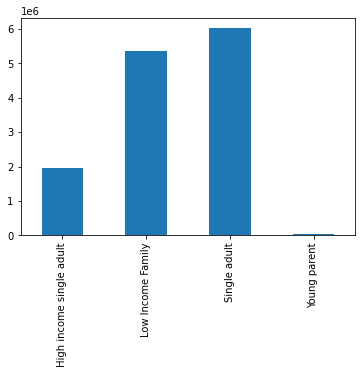

In [27]:
#Bar chart
bar = orders_products_customers['profile'].value_counts().sort_index().plot.bar()

In [28]:
bar.figure.savefig(os.path.join(path, '4. Analysis', 'bar_profile.png'))

# 09 Description Profile

In [29]:
#Spending
orders_products_customers['spending'] = orders_products_customers.groupby(['user_id'])['prices'].transform(np.sum)

In [30]:
#Group for spending
orders_products_customers.groupby('profile').agg({'spending': ['mean', 'min', 'max']})

spending                 
                             mean    min       max
profile                                           
High income single adult 3478.744 13.100 22595.500
Low Income Family        2869.096  3.000 18910.000
Single adult             3230.907  3.000 24307.100
Young parent             4498.927 59.200 18436.900

In [31]:
#Group for frequency
orders_products_customers.groupby('profile').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency             
                                    mean   min    max
profile                                              
High income single adult          10.156 0.000 30.000
Low Income Family                 10.766 0.000 30.000
Single adult                      10.430 0.000 30.000
Young parent                       9.133 0.000 30.000

# 10. Profile Accross Regions

In [32]:
ct_region_profiles = pd.crosstab(orders_products_customers['region'], orders_products_customers['profile'], dropna = False)

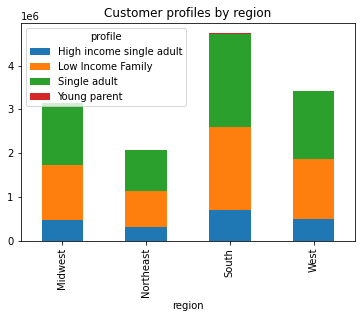

In [33]:
reg_profile_bar = ct_region_profiles.plot(kind='bar', stacked=True,
        title='Customer profiles by region')

In [34]:
reg_profile_bar.figure.savefig(os.path.join(path, '4. Analysis', 'bar_region_profile.png'))

# 11. Profile accross departments

In [35]:
ct_dep_profiles = pd.crosstab(orders_products_customers['department_id'], orders_products_customers['profile'], dropna = False)

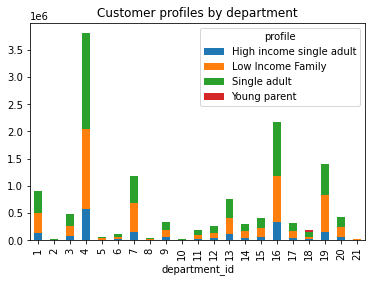

In [36]:
dep_profile_bar = ct_dep_profiles.plot(kind='bar', stacked=True,
        title='Customer profiles by department')

In [37]:
dep_profile_bar.figure.savefig(os.path.join(path, '4. Analysis', 'bar_dep_profile.png'))

# 12. Save Data

In [38]:
# Export data to pkl
orders_products_customers.to_pickle(os.path.join(path, '2. Data','Prepared Data', 'orders_products_together.pkl'))

# Data Saved and now defining a new function with the saved data. Path already defined

In [39]:
# Import data

orders_products_together = pd.read_pickle(os.path.join(path, '2. Data', 'Prepared Data','orders_products_together.pkl'))

# 13. Data Overview

In [40]:
#df overview
orders_products_together.shape

(32404859, 35)

In [41]:
orders_products_together.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'family_status', 'income', 'order_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_last_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices', 'price_range',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_spending', 'spender_flag', 'order_frequency',
       'frequency_flag', '_merge', 'region', 'activity_flag', 'profile',
       'spending'],
      dtype='object')

# 14 Spending and discovering the time of day

In [42]:
ct_spending_hour = pd.crosstab(orders_products_together['spending'], orders_products_together['order_hour_of_day'], dropna=False)

In [43]:
ct_spending_hour

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
spending,,,,,,,,,,,,,,,,,,,,,
3.000,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,2,0,0,0,1,0
3.300,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2,2,2,0,0,0,1
3.600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.900,0,0,0,0,0,0,0,0,1,0,...,0,3,0,1,0,1,0,0,0,1
4.000,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22595.500,0,0,0,0,0,0,0,0,0,32,...,115,721,635,187,205,31,3,0,0,0
22696.900,0,0,0,0,0,0,0,0,24,108,...,369,215,224,445,195,30,36,0,0,0
22777.900,0,0,0,0,0,0,0,54,184,206,...,307,261,334,241,40,116,158,0,22,36


In [44]:
#Order value
orders_products_together['order_value'] = orders_products_together.groupby(['order_id'])['prices'].transform(np.sum)

In [45]:
#Creating a sample
#Set seed for random number generator
np.random.seed(4)
#Create list holding boolean values to the test np.random.rand() <= 0.7
dev = np.random.rand(len(orders_products_together)) <= 0.7

In [46]:
#Splitting df
#Store 30% of smaple in df small
small = orders_products_together[~dev]

In [47]:
#Reducing sample to necessary columns
df_2 = small[['order_hour_of_day','spending']]

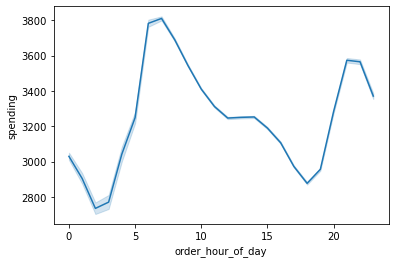

In [48]:
#Create line chart - spending through course of day
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'spending')

In [49]:
#Exporting charts
line.figure.savefig(os.path.join(path, '4. Analysis', 'ex4_10_line_spending_day.png'))

In [50]:
df_3 = small[['order_hour_of_day','order_value']]

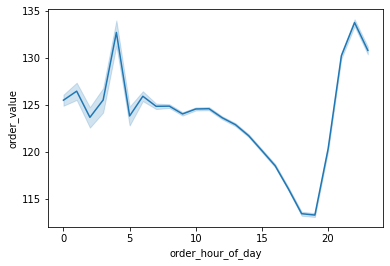

In [51]:
#Create line chart - spending through course of day
Order_value_day_line = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'order_value')

In [52]:
#Exporting chart
Order_value_day_line.figure.savefig(os.path.join(path, '4. Analysis', 'ex4_10_line_order_value_day.png'))

# 15 Price Range Products and which Department

In [53]:
ct_dep_price = pd.crosstab(orders_products_together['department_id'], orders_products_together['price_range'], dropna=False)

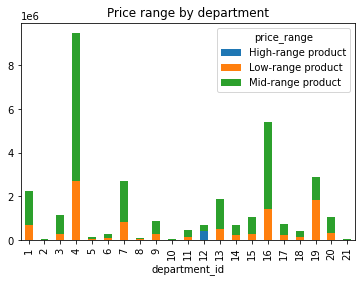

In [54]:
dep__price_bar = ct_dep_price.plot(kind='bar', stacked=True,
        title='Price range by department')

In [55]:
#Exporting charts
dep__price_bar.figure.savefig(os.path.join(path, '4. Analysis', 'ex4_10_bar_dep_price.png'))

# 16 Finding the Department Frequency

In [56]:
#deparment & order_frequency
#aggregating average orders per department
orders_products_together.groupby('department_id').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency             
                         mean   min    max
department_id                             
1                      11.047 0.000 30.000
2                      10.383 0.000 30.000
3                      10.344 0.000 30.000
4                      10.133 0.000 30.000
5                      10.094 0.000 30.000
6                      10.703 0.000 30.000
7                      10.375 0.000 30.000
8                      11.094 0.000 30.000
9                      11.016 0.000 30.000
10                      9.398 0.000 30.000
11                     11.008 0.000 30.000
12                     10.727 0.000 30.000
13                     10.656 0.000 30.000
14                     10.523 0.000 30.000
15                     11.016 0.000 30.000
16                     10.156 0.000 30.000
17                     11.367 0.000 30.000
18                      9.094 0.000 30.000
19                     10.352 0.000 30.000
20                     10.609 0.000 30.000
21                      9.445 0.000 30.000

# 16.1 Finding the Regional Differences (region and Department)

In [57]:
ct_region_dep = pd.crosstab(orders_products_together['department_id'], orders_products_together['region'], dropna = False)

In [58]:
ct_region_dep

region,Midwest,Northeast,South,West
department_id,,,,
1,524096,345032,793786,571829
2,8420,5749,13048,9074
3,273869,183764,413650,301145
4,2227937,1474885,3351505,2424964
5,36186,23327,54839,39344
6,63736,41178,94855,69484
7,625574,425306,957052,680191
8,22355,16551,33319,25491
9,203769,134121,305139,223598


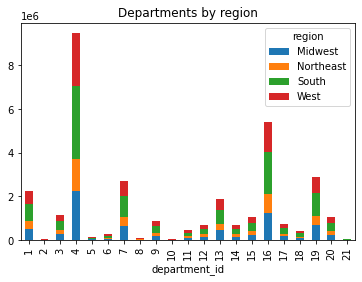

In [59]:
reg_dep_bar = ct_region_dep.plot(kind='bar', stacked=True,
        title='Departments by region', legend = 'bottom')

In [60]:
#Exporting charts
reg_dep_bar.figure.savefig(os.path.join(path, '4. Analysis', 'ex4-10_bar_dep_region.png'))

# 16.2 Finding the region and spending habits

In [61]:
ct_region_spending = pd.crosstab(orders_products_together['region'], orders_products_together['spender_flag'], dropna = False)

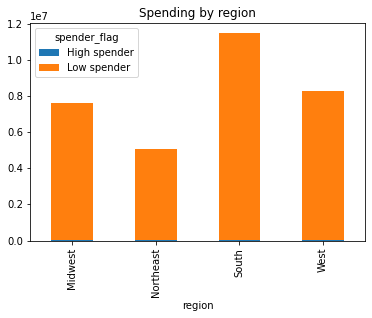

In [62]:
reg_spend_bar = ct_region_spending.plot(kind='bar', stacked=True,
        title='Spending by region')

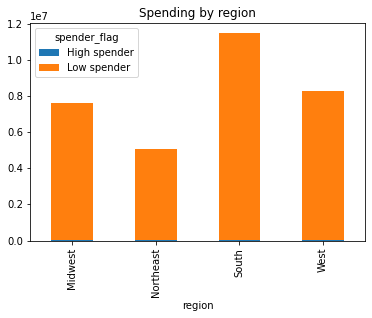

In [63]:
reg_spend_bar = ct_region_spending.plot(kind='bar', stacked=True,
        title='Spending by region')

In [64]:
ct_region_freq = pd.crosstab(orders_products_together['region'], orders_products_together['order_frequency'], dropna = False)

In [65]:
ct_region_freq

order_frequency,0.000,0.500,1.000,1.500,2.000,2.500,3.000,3.500,4.000,4.500,...,25.500,26.000,26.500,27.000,27.500,28.000,28.500,29.000,29.500,30.000
region,,,,,,,,,,,,,,,,,,,,,
Midwest,7186,63,30044,70,122981,880,351820,3383,528418,7206,...,2565,35767,1828,43276,1709,47688,1495,31581,1042,395811
Northeast,5752,25,27881,111,95002,315,220088,2454,362622,5249,...,931,26121,482,25966,557,32663,1069,22504,745,263090
South,12746,103,51655,1243,196204,3785,539469,3147,812112,11411,...,2407,59514,1818,60391,2302,68666,2237,49233,1832,594372
West,8556,44,42538,260,146977,2269,368610,3484,611137,5630,...,2007,40549,1386,43587,1031,50887,1750,33601,1476,430577


In [66]:
COLORS= {'West':'yellow','South':'orange','Northeast':'green','Midwest':'blue'}

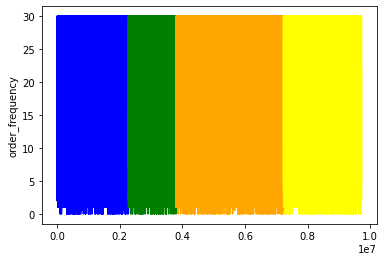

In [67]:
gk = small.groupby("region")
x = np.arange(len(small))
index = 0
for region_name, region_group in gk:
    sns.lineplot(
        x=x[index : index + len(region_group)],
        y=region_group.order_frequency,
        color=COLORS.get(region_name),
    )
    index += len(region_group)
plt.show()

# 16.3 Finding the relation between Region and Prices

In [68]:
ct_region_price = pd.crosstab(orders_products_together['region'], orders_products_together['price_range'], dropna = False)

In [69]:
ct_region_price.to_clipboard()

# 17 relationship between Loyalty and Spending

In [70]:
ct_loyalty_spending = pd.crosstab(orders_products_together['loyalty_flag'], orders_products_together['spender_flag'], dropna=False)

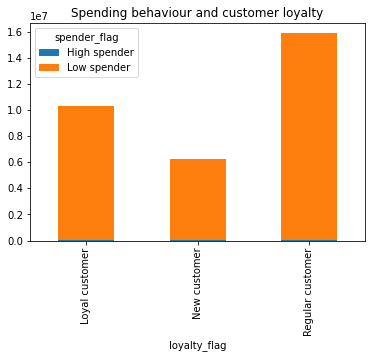

In [71]:
loyal_spend_bar = ct_loyalty_spending.plot(kind='bar', stacked=True, title="Spending behaviour and customer loyalty")

In [72]:
ct_loyalty_spending.to_clipboard()